## Supervised Learning - Building a Student Performance Classification System


#### The aim of this project is to predict how likely a student is to pass. 

This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Drop missing values.

4.Transform Data

5.Drop variables with less variance

6.Encode all categorical variables to numerical

7.Convert the continuous values of grades into classes

8.Apply the models.

9.Visualization

10.Provide insights.

11.Training and testing data split

12.Model Implementation and Testing the Accuracy

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Importing Libraries

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_object_dtype
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

## Exploring the Data

## Question 1 - Read Dataset, Print Columns and Drop missing values


#### Answer:

#In case you are working in Google Colab, Upload the csv file to colab.
from google.colab import files

uploaded = files.upload()

In [124]:
# Read dataset using pandas and print few rows
# Hint: Read the dataset file using pandas.read_csv(). Take care about the delimiter.

dfstudent = pd.read_csv("students-data.csv", delimiter=";" )
dfstudent.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [125]:
# Print the columns in the dataframe
dfstudent.columns


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [126]:
# Drop missing values
# Hint: Set the index name of the dataframe to "number". Check sample of data to drop if any missing values are there
dfstudent.isnull().sum().any()

False

In [127]:
dfstudent.index.rename('number',inplace='True')
dfstudent.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Transform Data

## Question 2 - Print all the attribute names which are not numerical.

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [128]:
dfstudent.select_dtypes(include='object').columns


Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

## Question 3 - Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [129]:
dfstudent.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [130]:
for idx in dfstudent.columns:
        if(is_numeric_dtype(dfstudent.dtypes[idx])and dfstudent[idx].var() < 1):
            print(' Attribute name - ',idx, ' has variance less than 1') 
            dfstudent.drop(idx,axis=1,inplace =True)



 Attribute name -  traveltime  has variance less than 1
 Attribute name -  studytime  has variance less than 1
 Attribute name -  failures  has variance less than 1
 Attribute name -  famrel  has variance less than 1
 Attribute name -  freetime  has variance less than 1
 Attribute name -  Dalc  has variance less than 1


In [131]:
dfstudent.shape

(395, 27)

#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [132]:
le = LabelEncoder()
for i in range(0,dfstudent.shape[1]):
    if dfstudent.dtypes[i]=='object':
        dfstudent[dfstudent.columns[i]] = le.fit_transform(dfstudent[dfstudent.columns[i]])


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [134]:
for i in ['G1','G2','G3']:
    dfstudent[i]= dfstudent[i].apply(lambda x: 1 if (x >= 10) else 0)


In [135]:
dfstudent.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


## Apply the models.

## Question 6 - Separate Feature and Target
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [143]:
# Target values are G3
# Feature set is remaining features

x = dfstudent.drop(['G3'], axis=1)
y = dfstudent['G3']



In [145]:
x.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,1,0,0,4,1,3,6,0,0
1,0,0,17,1,0,1,1,1,0,2,...,0,1,1,0,3,1,3,4,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,1,0,2,3,3,10,0,0
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,1,2,1,5,2,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,1,0,0,2,2,5,4,0,1


In [151]:
print(x.shape)
print(y.shape)

(395, 26)
(395,)


## Visualization

## Question 7 - Plot G2 and G3 and give your understanding on relation between both variables.

* Hint:Bar plot to compare counts of '0' and '1' in G2 and G3

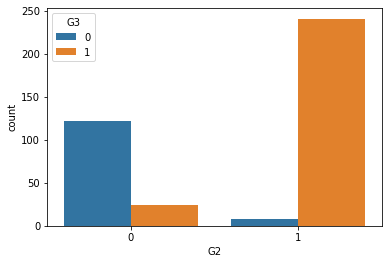

In [155]:
sns.countplot(x="G2", hue="G3", data=dfstudent)


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.
<br>
Conclusion: Fail percentage is less in G3 when compare to G2



## Question 8 - Plot the number of students in each school and number of students with different ages in separate plots.

* Hint: Bar plots using unique value counts

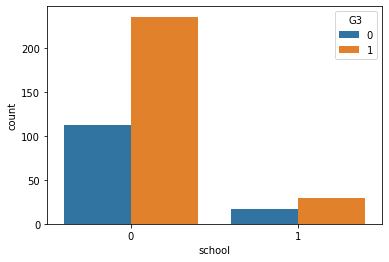

In [161]:
sns.countplot(x="school", hue='G3', data=dfstudent)

Conclusion: Almost equal pass percentage across schools

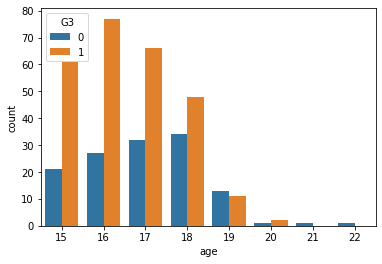

In [162]:
sns.countplot(x="age", hue='G3', data=dfstudent, )

Conclusion: Pass percentage is high between age 15 and 18

## Question 9 - Training and Testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [165]:
from sklearn.model_selection import  train_test_split
# Set the number of training points
#num_train = ##

# Set the number of testing points
#num_test = ##

# Shuffle and split the dataset into the number of training and testing points above

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=300, test_size=95, random_state=1)


# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 300 samples.
Testing set has 95 samples.


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression, Naive Bayes and KNN** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

Logistic Regression

In [199]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
predicted = lr.predict(X_test)
y_train_pre = lr.predict(X_train)
print("Testing Accuracy")
print(lr.score(X_test,y_test))
print("Training Accuracy")
print(lr.score(X_train,y_train))



Testing Accuracy
0.9052631578947369
Training Accuracy
0.9333333333333333


In [173]:
from sklearn.metrics import classification_report,confusion_matrix,recall_score
# F1 score for Testing set

print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

[[25  3]
 [ 6 61]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.95      0.91      0.93        67

   micro avg       0.91      0.91      0.91        95
   macro avg       0.88      0.90      0.89        95
weighted avg       0.91      0.91      0.91        95



In [215]:
# F1 score for training set
print(classification_report(y_train,y_train_pre))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       102
           1       0.97      0.93      0.95       198

   micro avg       0.93      0.93      0.93       300
   macro avg       0.92      0.94      0.93       300
weighted avg       0.94      0.93      0.93       300



Naive Bayes Classifier

In [205]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_class = nb.predict(X_test)
y_train_pre_cls = nb.predict(X_train)
print("Training Accuracy")
print(nb.score(X_train,y_train))
print("Testing Accuracy")
print(nb.score(X_test,y_test))
print("Number of features")
print(X_test.shape)

Training Accuracy
0.8966666666666666
Testing Accuracy
0.8842105263157894
Number of features
(95, 26)


In [206]:
# F1 score for testing set
print(confusion_matrix(y_test,y_pred_class))
print(classification_report(y_test,y_pred_class))


[[25  3]
 [ 8 59]]
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        28
           1       0.95      0.88      0.91        67

   micro avg       0.88      0.88      0.88        95
   macro avg       0.85      0.89      0.87        95
weighted avg       0.89      0.88      0.89        95



In [216]:
# F1 score for training set
print(classification_report(y_train,y_train_pre_cls))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       102
           1       0.96      0.88      0.92       198

   micro avg       0.90      0.90      0.90       300
   macro avg       0.88      0.90      0.89       300
weighted avg       0.90      0.90      0.90       300



K-neighbours Classifier

In [208]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
y_train_predicted = knn.predict(X_train)
print("Training Accuracy")
print(knn.score(X_train,y_train))
print("Testing Accuracy")
print(knn.score(X_test,y_test))


Training Accuracy
0.7866666666666666
Testing Accuracy
0.7368421052631579


In [214]:
print("Overfit model since training accuracy is ~5% higher than testing score")

Overfit model since training accuracy is ~5% higher than testing score


In [217]:
# F1 score for testing set
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[12 16]
 [ 9 58]]
              precision    recall  f1-score   support

           0       0.57      0.43      0.49        28
           1       0.78      0.87      0.82        67

   micro avg       0.74      0.74      0.74        95
   macro avg       0.68      0.65      0.66        95
weighted avg       0.72      0.74      0.72        95



In [212]:
# F1 score training set
print(classification_report(y_train,y_train_predicted))

              precision    recall  f1-score   support

           0       0.79      0.51      0.62       102
           1       0.79      0.93      0.85       198

   micro avg       0.79      0.79      0.79       300
   macro avg       0.79      0.72      0.74       300
weighted avg       0.79      0.79      0.77       300

